# Anomaly Detection

Anomaly detection is a process for identifying unexpected data, event or behavior that require some examination. It is a well-established field within data science and there is a large number of algorithms to detect anomalies in a dataset depending on data type and business context.

### z-score
Z-score is probably the simplest algorithm that can rapidly screen candidates for further examination to determine whether they are suspicious or not.

### What is Z-score
Simply speaking, Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.
For example, a Z score of 2.5 means that the data point is 2.5 standard deviation far from the mean. And since it is far from the center, it’s flagged as an outlier/anomaly.

In [30]:
import pandas as pd
import numpy as np

from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import precision_score, recall_score, f1_score

import io
import requests
import os

from sklearn.model_selection import train_test_split
from sklearn import metrics

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

## Data

In [2]:
from tensorflow.keras.utils import get_file

try:
    path = get_file('kddcup.data_10_percent.gz', origin=
    'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz ')
except:
    print('Error downloading')
    raise

df = pd.read_csv(path, header=None)
df.head()


2144903/2144903 [==============================] - 1s 0us/step


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


### Save the modified dataset:



In [ ]:
#df.to_csv('KDD99_dataset.csv')

In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [5]:
df.shape

(494021, 42)

## Data Analysis

In [6]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### analyze_column()
Since, there are a lot of columns to understand we are building as custom function

This function takes a column name (in quotes eg. 'column name')

And, returns:
- A sample of the data.
- If the column's data is Numerical or String.
- Types of categories.
- Count of all the categories.

With this function we can easily analyse all the columns and understand the data.

In [7]:
def analyze_column(col):

  categories = df[col].unique()
  count = df[col].value_counts()
  ucount = df[col].nunique()

  print(df[col].sample(10))
  if is_numeric_dtype(df[col]) == True:
    print("\n\n\nNumeric DataType")
  elif is_string_dtype(df[col]) == True:
    print("\n\n\nString DataType")
  else:
    print("Unknown Datatype")

  print("\n\n\nCategories:",categories)
  print("\n\n\nNumber of Categories:",ucount)
  print("\nCounts:\n",count)

analyze_column('num_file_creations')

461411    0
373123    0
170366    0
342282    0
292039    0
294253    0
400601    0
210869    0
321796    0
406849    0
Name: num_file_creations, dtype: int64



Numeric DataType



Categories: [ 0  1  2  4 15  9 16 28 10 21 14  5  7  8 12 25 22 20]



Number of Categories: 18

Counts:
 0     493756
1        207
2         36
4          7
16         2
5          1
22         1
25         1
12         1
8          1
7          1
21         1
14         1
10         1
28         1
9          1
15         1
20         1
Name: num_file_creations, dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

### Encoding features
From the insights drawn by alaysis of the columns individually, we decide to convert some columns to Z-scores and others to a One Hot Encoding.

In [9]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [10]:
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_text_dummy(df, 'land')
encode_text_dummy(df, 'logged_in')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')



encode_numeric_zscore(df, 'duration')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')


In [11]:
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,-0.005679,-0.010552,-0.004676,...,0,1,0,1,0,0,1,1,1,0


In [12]:
df.dropna(inplace=True,axis=1)

In [13]:
# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values

dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)

y = dummies.values

In [14]:
df.groupby('outcome')['outcome'].count()

outcome
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.              1247
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  231
normal.              97278
perl.                    3
phf.                     4
pod.                   264
portsweep.            1040
rootkit.                10
satan.                1589
smurf.              280790
spy.                     2
teardrop.              979
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

## Neural Network

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.add(Dense(y.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor],verbose=2,epochs=100)


Epoch 1/100
12351/12351 - 27s - loss: 0.1084 - accuracy: 0.9716 - val_loss: 0.0370 - val_accuracy: 0.9893 - 27s/epoch - 2ms/step
Epoch 2/100
12351/12351 - 25s - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0276 - val_accuracy: 0.9911 - 25s/epoch - 2ms/step
Epoch 3/100
12351/12351 - 24s - loss: 0.0284 - accuracy: 0.9931 - val_loss: 0.0247 - val_accuracy: 0.9941 - 24s/epoch - 2ms/step
Epoch 4/100
12351/12351 - 26s - loss: 0.0257 - accuracy: 0.9948 - val_loss: 0.0230 - val_accuracy: 0.9951 - 26s/epoch - 2ms/step
Epoch 5/100
12351/12351 - 26s - loss: 0.0234 - accuracy: 0.9952 - val_loss: 0.0208 - val_accuracy: 0.9956 - 26s/epoch - 2ms/step
Epoch 6/100
12351/12351 - 25s - loss: 0.0226 - accuracy: 0.9958 - val_loss: 0.0222 - val_accuracy: 0.9974 - 25s/epoch - 2ms/step
Epoch 7/100
12351/12351 - 26s - loss: 0.0216 - accuracy: 0.9960 - val_loss: 0.0199 - val_accuracy: 0.9970 - 26s/epoch - 2ms/step
Epoch 8/100
12351/12351 - 25s - loss: 0.0245 - accuracy: 0.9964 - val_loss: 0.0207 - val_accuracy

# Measure accuracy

In [26]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

3088/3088 [==============================] - 6s 2ms/step
Validation score: 0.9956277516320025


In [36]:
# Access training history for metrics
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print or use the metrics as needed
print(f'Training Accuracy: {train_accuracy[-1]}, Validation Accuracy: {val_accuracy[-1]}')

Training Accuracy: 0.9966246485710144, Validation Accuracy: 0.9961844086647034


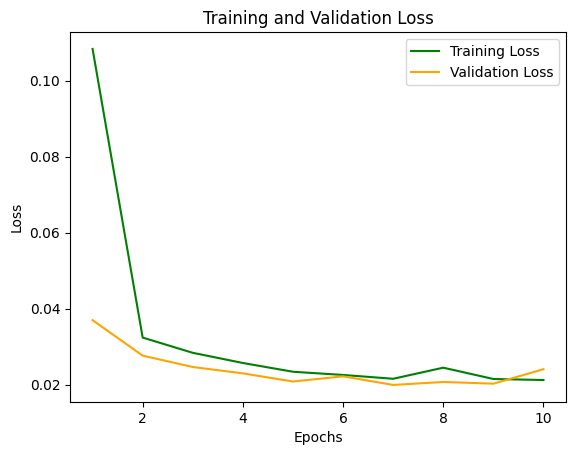

In [25]:
#train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'green', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model Pickle

In [ ]:
model.save("zscore_ANN.h5")